<h1 align="center"> MNIST TensorFlow </h1>

A large part of this tutorial's purpose is to visualize weights using TensorFlow


In [1]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from __future__ import print_function
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from struct import unpack
%matplotlib inline

Look into normalizing the data here. Maybe not instructional to have separate cell on it. 

In [2]:
def loadmnist(imagefile, labelfile):

    # Open the images with gzip in read binary mode
    images = open(imagefile, 'rb')
    labels = open(labelfile, 'rb')

    # Get metadata for images
    images.read(4)  # skip the magic_number
    number_of_images = images.read(4)
    number_of_images = unpack('>I', number_of_images)[0]
    rows = images.read(4)
    rows = unpack('>I', rows)[0]
    cols = images.read(4)
    cols = unpack('>I', cols)[0]

    # Get metadata for labels
    labels.read(4)
    N = labels.read(4)
    N = unpack('>I', N)[0]

    # Get data
    x = np.zeros((N, rows*cols), dtype=np.uint8)  # Initialize numpy array
    y = np.zeros(N, dtype=np.uint8)  # Initialize numpy array
    for i in range(N):
        for j in range(rows*cols):
            tmp_pixel = images.read(1)  # Just a single byte
            tmp_pixel = unpack('>B', tmp_pixel)[0]
            x[i][j] = tmp_pixel
        tmp_label = labels.read(1)
        y[i] = unpack('>B', tmp_label)[0]

    images.close()
    labels.close()
    return (x, y)

def non_flattened_image(image):
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.axis('off')
    plt.show()

def flattened_image(image):
    plt.imshow(np.reshape(image, (784,1)), cmap=plt.cm.gray)
    plt.axis('off')
    plt.show()

In [44]:
train_img_path = 'train-images-idx3-ubyte' 
train_lbl_path = 'train-labels-idx1-ubyte' 
test_img_path = 't10k-images-idx3-ubyte' 
test_lbl_path = 't10k-labels-idx1-ubyte'

x_train, y_train = loadmnist(train_img_path, train_lbl_path)
x_train, y_train = np.array(x_train).real.astype(np.float32, copy=False), np.array(y_train).real.astype(np.float32, copy=False) 
testing_data, testing_labels = loadmnist(test_img_path, test_lbl_path)
testing_data, testing_labels = np.array(testing_data).real.astype(np.float32, copy=False), np.array(testing_labels).real.astype(np.float32, copy=False) 

<h1 align="left"> Making a Validation Test Set </h1>

training, validation, and test data set explanation

In [45]:
# The shape of the dataset is 60000 by 784. Each of the images is shaped flattened
x_train.shape

(60000, 784)

In [46]:
len(x_train)

60000

In [47]:
training_number = len(x_train) * 3/4
validation_number = len(x_train) * 1/4
total_number = training_number + validation_number
print ('training size: {}'.format(training_number))
print ('validation size: {}'.format(validation_number))
print ('training + validation size: {}'.format(training_number + validation_number))

training size: 45000
validation size: 15000
training + validation size: 60000


In [48]:
training_data, validation_data = x_train[0:training_number], x_train[training_number:total_number]

In [49]:
training_labels, validation_labels = y_train[0:training_number], y_train[training_number:total_number]

<h1 align="left"> Show example of the data </h1>

<h3 align="left"> How the Computer Sees the Data With Multinomial Logistic Regression </h3>

What is Logistic Regression? What is Multinomial Logistic Regression (Softmax Regression)?

This model doesn't account for the interrelationships between pixels as you can see below. 

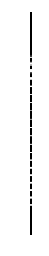

In [50]:
flattened_image(training_data[0,:])

<h3 align="left"> How we See the Data </h3>

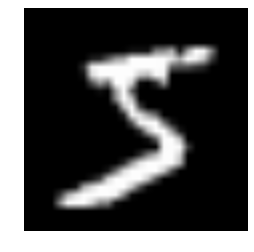

In [51]:
non_flattened_image(training_data[0,:])

<h1 align="left"> What is Logistic Regression? </h1>

research from tensorflow website

<h1 align="left"> What is Multinomial Logistic Regression (Softmax Regression)? </h1>

research from tensorflow website (maybe the image from the website) 

We're first going to train a multinomial logistic regression (sigmoid regression) using simple gradient descent.

TensorFlow works like this:
* First you describe the computation that you want to see performed: what the inputs, the variables, and the operations look like. These get created as nodes over a computation graph. This description is all contained within the block below:

      with graph.as_default():
          ...

* Then you can run the operations on this graph as many times as you want by calling `session.run()`, providing it outputs to fetch from the graph that get returned. This runtime operation is all contained in the block below:

      with tf.Session(graph=graph) as session:
          ...

Let's load all the data into TensorFlow and build the computation graph corresponding to our training:

In [38]:
from __future__ import print_function

import tensorflow as tf

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

# Parameters
learning_rate = 0.01
training_epochs = 25
batch_size = 100
display_step = 1

# tf Graph Input
x = tf.placeholder(tf.float32, [None, 784]) # mnist data image of shape 28*28=784
y = tf.placeholder(tf.float32, [None, 10]) # 0-9 digits recognition => 10 classes

# Set model weights
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

# Construct model
pred = tf.nn.softmax(tf.matmul(x, W) + b) # Softmax

# Minimize error using cross entropy
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))
# Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initializing the variables
init = tf.initialize_all_variables()

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [43]:
type(mnist.train.)

numpy.ndarray

In [39]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_xs,
                                                          y: batch_ys})
            # Compute average loss
            avg_cost += c / total_batch
        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))

    print("Optimization Finished!")

    # Test model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))

Epoch: 0001 cost= 1.182138978
Epoch: 0002 cost= 0.664755007
Epoch: 0003 cost= 0.552493345
Epoch: 0004 cost= 0.498611760
Epoch: 0005 cost= 0.465482047
Epoch: 0006 cost= 0.442566673
Epoch: 0007 cost= 0.425448460
Epoch: 0008 cost= 0.412102622
Epoch: 0009 cost= 0.401347178
Epoch: 0010 cost= 0.392331279
Epoch: 0011 cost= 0.384745220
Epoch: 0012 cost= 0.378130858
Epoch: 0013 cost= 0.372387048
Epoch: 0014 cost= 0.367285533
Epoch: 0015 cost= 0.362673161
Epoch: 0016 cost= 0.358586517
Epoch: 0017 cost= 0.354888838
Epoch: 0018 cost= 0.351474208
Epoch: 0019 cost= 0.348237709
Epoch: 0020 cost= 0.345426560
Epoch: 0021 cost= 0.342725641
Epoch: 0022 cost= 0.340232040
Epoch: 0023 cost= 0.337920682
Epoch: 0024 cost= 0.335737725
Epoch: 0025 cost= 0.333696858
Optimization Finished!
Accuracy: 0.9138


In [53]:
# With gradient descent training, even this much data is prohibitive.
# Subset the training data for faster turnaround.
train_subset = 10000
image_size = 28
num_labels = 10

graph = tf.Graph()
with graph.as_default():

    # Input data.
    # Load the training, validation and test data into constants that are
    # attached to the graph.
    tf_train_dataset = tf.constant(training_data[:train_subset, :])
    tf_train_labels = tf.constant(training_labels[:train_subset], 10)
    tf_valid_dataset = tf.constant(validation_data)
    tf_test_dataset = tf.constant(testing_data)
  
    # Variables.
    # These are the parameters that we are going to be training. The weight
    # matrix will be initialized using random values following a (truncated)
    # normal distribution. The biases get initialized to zero.
    weights = tf.Variable(
    tf.truncated_normal([image_size * image_size, num_labels]))
    biases = tf.Variable(tf.zeros([num_labels]))
  
    # Training computation.
    # We multiply the inputs with the weight matrix, and add biases. We compute
    # the softmax and cross-entropy (it's one operation in TensorFlow, because
    # it's very common, and it can be optimized). We take the average of this
    # cross-entropy across all training examples: that's our loss.
    logits = tf.matmul(tf_train_dataset, weights) + biases
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, tf_train_labels))
  
    # Optimizer.
    # We are going to find the minimum of this loss using gradient descent.
    optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss)
  
    # Predictions for the training, validation, and test data.
    # These are not part of training, but merely here so that we can report
    # accuracy figures as we train.
    train_prediction = tf.nn.softmax(logits)
    valid_prediction = tf.nn.softmax(tf.matmul(tf_valid_dataset, weights) + biases)
    test_prediction = tf.nn.softmax(tf.matmul(tf_test_dataset, weights) + biases)

TypeError: Input 'labels' of 'SoftmaxCrossEntropyWithLogits' Op has type bool that does not match type float32 of argument 'features'.

Let's run this computation and iterate:

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

V_accur_list = [] #verification accuracy list
step_list = [] # step number list
cost_list = []

In [ ]:
num_steps = 801

def accuracy(predictions, labels):
    return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1)) / predictions.shape[0])

with tf.Session(graph=graph) as session:
    # This is a one-time operation which ensures the parameters get initialized as
    # we described in the graph: random weights for the matrix, zeros for the
    # biases. 
    tf.initialize_all_variables().run()
    print('Initialized')
    for step in range(num_steps):
        # Run the computations. We tell .run() that we want to run the optimizer,
        # and get the loss value and the training predictions returned as numpy
        # arrays.
        _, l, predictions = session.run([optimizer, loss, train_prediction])
        if (step % 20 == 0):
            cost_list.append(l)
            step_list.append(step)
            print('Loss at step %d: %f' % (step, l))
            print('Training accuracy: %.1f%%' % accuracy(
            predictions, train_labels[:train_subset, :]))
            # Calling .eval() on valid_prediction is basically like calling run(), but
            # just to get that one numpy array. Note that it recomputes all its graph
            # dependencies.
            valid_accuracy = accuracy(valid_prediction.eval(), valid_labels)
            V_accur_list.append(valid_accuracy)
            print('Validation accuracy: %.1f%%' % valid_accuracy)
    test_accuracy = accuracy(test_prediction.eval(), test_labels)
    print('Test accuracy: %.1f%%' % test_accuracy)
    #This line below allows for taking the predictions to a pandas dataframe and eventually a heatmap/confusion matrix
    pred = test_prediction.eval()

Normalizing The Data